In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample

# Importing custom modules
from ed_analysis import read_data, clean_data
from ed_analysis import DataFeaturizer, FeatureExtractor, FeatureSelector
from classification_module import Model, PerformanceMetric

# Exploratory Data Analysis

In [2]:
# Reads dataset from file path provided
act_data = read_data('activity_context_tracking_data.csv')
act_data

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,1,125,-17,2,0.070997,-0.131696,-0.877469,-0.038307,2.681510,8.65743,-0.041316,2.67655,8.64271,-31.2,-35.6,-37.6,5000,49.56,Sitting
1,2,126,-17,2,0.071486,-0.131480,-0.878024,-0.038307,2.681510,8.65743,-0.054196,2.67834,8.64654,-31.2,-36.0,-37.2,5000,53.38,Sitting
2,3,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,53.38,Sitting
3,4,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,49.53,Sitting
4,5,127,-17,2,0.070772,-0.131888,-0.879645,0.153229,2.681510,8.65743,-0.049128,2.68130,8.65458,-31.2,-35.6,-36.8,5000,49.53,Sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205515,205516,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205516,205517,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205517,205518,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205518,205519,288,4,-2,-0.066261,-0.039767,0.615725,-0.383072,-1.149220,10.61110,-0.203887,-1.62111,10.47650,31.6,12.4,-35.6,5000,59.40,DescendingStairs


In [8]:
# Data cleaning
# new_data = clean_data(act_data, ['_id','lux','soundLevel'])
new_data = clean_data(act_data, drop_list=['_id'])

In [9]:
# Displaying initial dataset info.
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205520 entries, 0 to 205519
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   orX         205520 non-null  int64  
 1   orY         205520 non-null  int64  
 2   orZ         205520 non-null  int64  
 3   rX          205520 non-null  float64
 4   rY          205520 non-null  float64
 5   rZ          205520 non-null  float64
 6   accX        205520 non-null  float64
 7   accY        205520 non-null  float64
 8   accZ        205520 non-null  float64
 9   gX          205520 non-null  float64
 10  gY          205520 non-null  float64
 11  gZ          205520 non-null  float64
 12  mX          205520 non-null  float64
 13  mY          205520 non-null  float64
 14  mZ          205520 non-null  float64
 15  lux         205520 non-null  int64  
 16  soundLevel  205520 non-null  float64
 17  activity    205520 non-null  object 
dtypes: float64(13), int64(4), object(1)
memory u

In [10]:
# Intializing the DataFeaturizer Class.
df = DataFeaturizer(new_data)

In [11]:
# Encoding the target variable and normalizing the features
df.set_features('activity', encode_target = True, feature_processor='normalizer')

In [12]:
# getting the processed features and encoded target.
features = df.processed_features
target = df.target

# Converting back to Dataframe for processing.
features_pd = pd.DataFrame(features, columns=new_data.drop('activity', axis = 1).columns)
target_pd = pd.DataFrame(target, columns = [new_data.columns[-1]])

# concating the feature_pd and target_pd to create the new processed data (proc_data)
proc_data = pd.concat((features_pd, target_pd),axis =1)
proc_data.head()

,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,0.024989,-0.003398,0.0004,0.000014,-0.000026,-0.000175,-0.000008,0.000536,0.001731,-0.000008,0.000535,0.001728,-0.006237,-0.007117,-0.007517,0.999556,0.009908,10
1,0.025188,-0.003398,0.0004,0.000014,-0.000026,-0.000176,-0.000008,0.000536,0.001731,-0.000011,0.000535,0.001729,-0.006237,-0.007197,-0.007437,0.999544,0.010671,10
2,0.025388,-0.003398,0.0004,0.000014,-0.000026,-0.000176,0.000031,0.000536,0.001731,-0.000011,0.000536,0.001729,-0.006237,-0.007197,-0.007437,0.999539,0.010671,10
3,0.025388,-0.003398,0.0004,0.000014,-0.000026,-0.000176,0.000031,0.000536,0.001731,-0.000011,0.000536,0.001729,-0.006237,-0.007197,-0.007437,0.999546,0.009902,10
4,0.025389,-0.003398,0.0004,0.000014,-0.000026,-0.000176,0.000031,0.000536,0.001731,-0.000010,0.000536,0.001730,-0.006237,-0.007117,-0.007357,0.999548,0.009902,10


In [13]:
# Displaying the information of the processed data set.
proc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205520 entries, 0 to 205519
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   orX         205520 non-null  float64
 1   orY         205520 non-null  float64
 2   orZ         205520 non-null  float64
 3   rX          205520 non-null  float64
 4   rY          205520 non-null  float64
 5   rZ          205520 non-null  float64
 6   accX        205520 non-null  float64
 7   accY        205520 non-null  float64
 8   accZ        205520 non-null  float64
 9   gX          205520 non-null  float64
 10  gY          205520 non-null  float64
 11  gZ          205520 non-null  float64
 12  mX          205520 non-null  float64
 13  mY          205520 non-null  float64
 14  mZ          205520 non-null  float64
 15  lux         205520 non-null  float64
 16  soundLevel  205520 non-null  float64
 17  activity    205520 non-null  int32  
dtypes: float64(17), int32(1)
memory usage: 27.4 

In [14]:
# Checking for correlation between features and the target variable
corr_matrix = proc_data.corr()
corr_matrix['activity'].sort_values(ascending=False)

activity      1.000000
mZ            0.339570
lux           0.338239
mY            0.173590
gY            0.144890
accY          0.137923
mX            0.102984
rZ            0.097807
rX            0.003361
orY          -0.045149
accX         -0.045765
rY           -0.046950
gX           -0.053284
orZ          -0.058377
accZ         -0.354636
gZ           -0.358165
soundLevel   -0.381145
orX          -0.387598
Name: activity, dtype: float64

In [15]:
# Checking for correlations greater than 0.1
corr_matrix = proc_data.corr()
corr_matrix[abs(corr_matrix['activity'])>0.1]['activity'].sort_values(ascending=False)

activity      1.000000
mZ            0.339570
lux           0.338239
mY            0.173590
gY            0.144890
accY          0.137923
mX            0.102984
accZ         -0.354636
gZ           -0.358165
soundLevel   -0.381145
orX          -0.387598
Name: activity, dtype: float64

In [16]:
# Displaying the overall regression and correlation table for the proccessed data set.
proc_data.corr()

,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
orX,1.000000,0.233214,0.122335,-0.136319,0.065166,-0.489959,0.113946,-0.319730,0.949576,0.125356,-0.333525,0.957858,-0.341561,-0.693053,-0.905898,-0.980558,0.960926,-0.387598
orY,0.233214,1.000000,0.034685,-0.259323,0.314759,-0.162003,0.027931,-0.890619,0.297635,0.026065,-0.861854,0.314169,-0.112079,0.250159,-0.330117,-0.247864,0.235029,-0.045149
orZ,0.122335,0.034685,1.000000,-0.690794,-0.640249,-0.127391,0.958825,-0.008195,0.028356,0.939922,-0.002681,0.027202,-0.680714,0.048875,0.035573,-0.171864,0.188644,-0.058377
rX,-0.136319,-0.259323,-0.690794,1.000000,0.413362,0.177160,-0.638676,0.157887,-0.122504,-0.679411,0.171765,-0.116951,0.534425,-0.092884,0.048816,0.189428,-0.215513,0.003361
rY,0.065166,0.314759,-0.640249,0.413362,1.000000,-0.130324,-0.586595,-0.426326,0.141364,-0.597228,-0.446477,0.142873,0.361270,0.052494,-0.212266,-0.021851,0.010843,-0.046950
rZ,-0.489959,-0.162003,-0.127391,0.177160,-0.130324,1.000000,-0.119090,0.223594,-0.586012,-0.133341,0.235998,-0.589086,0.575003,0.321435,0.589219,0.517095,-0.579445,0.097807
accX,0.113946,0.027931,0.958825,-0.638676,-0.586595,-0.119090,1.000000,-0.017364,0.021147,0.937610,-0.000663,0.024641,-0.691066,0.055243,0.012084,-0.157841,0.171041,-0.045765
accY,-0.319730,-0.890619,-0.008195,0.157887,-0.426326,0.223594,-0.017364,1.000000,-0.383083,-0.015521,0.932584,-0.389973,0.122428,-0.209662,0.424091,0.329203,-0.328061,0.137923
accZ,0.949576,0.297635,0.028356,-0.122504,0.141364,-0.586012,0.021147,-0.383083,1.000000,0.049687,-0.408293,0.987729,-0.389399,-0.621721,-0.949387,-0.944447,0.963717,-0.354636
gX,0.125356,0.026065,0.939922,-0.679411,-0.597228,-0.133341,0.937610,-0.015521,0.049687,1.000000,-0.021766,0.043613,-0.719792,0.051915,-0.009540,-0.173755,0.199753,-0.053284


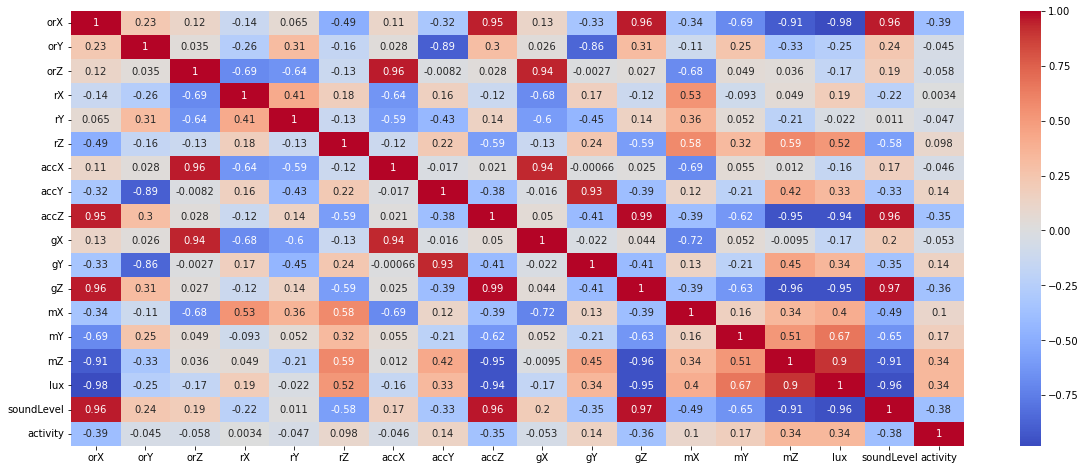

In [17]:
# A Heatmap displaying a visualization of the correlations between the columns.

# Assigning plot size
plt.subplots(figsize=(20,8))

# Geneting heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

In [18]:
# An overview of basic statistical descriptions of the proccesed dataset.
proc_data.describe()

,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
count,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000,205520.000000
mean,0.179208,0.001893,0.003136,-0.000014,0.000007,-0.000425,0.000409,-0.000852,0.010238,0.000442,-0.000858,0.010245,-0.006366,-0.016118,-0.041936,0.843738,0.053322,9.573832
std,0.313971,0.034129,0.044294,0.000297,0.000346,0.002064,0.005919,0.005398,0.019685,0.005797,0.005179,0.019531,0.041246,0.045840,0.090972,0.353782,0.096281,2.861155
min,0.000000,-0.791902,-0.325988,-0.003475,-0.003997,-0.010857,-0.081080,-0.054414,-0.018094,-0.046281,-0.033591,-0.002149,-0.375941,-0.312117,-0.711149,0.000000,-0.005308,0.000000
25%,0.016593,-0.000400,-0.000600,-0.000027,-0.000021,-0.000164,-0.000092,-0.000757,0.001050,-0.000085,-0.000757,0.001011,-0.003038,-0.004957,-0.010472,0.997249,0.005979,10.000000
50%,0.043355,0.001199,-0.000133,-0.000006,-0.000002,0.000056,0.000015,-0.000222,0.002097,0.000012,-0.000217,0.002091,0.000773,-0.001320,-0.004240,0.998786,0.011011,10.000000
75%,0.059092,0.003794,0.000700,0.000002,0.000009,0.000120,0.000115,0.000073,0.002327,0.000092,0.000047,0.002162,0.002955,0.001118,-0.001813,0.999809,0.013875,12.000000
max,0.980604,0.821375,0.646769,0.002924,0.002119,0.008205,0.076467,0.103426,0.192360,0.073691,0.025824,0.131637,0.287848,0.240178,0.155455,0.999993,0.742148,12.000000


# Data Visualization

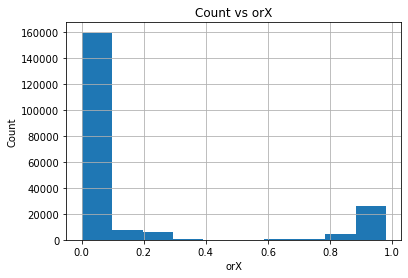

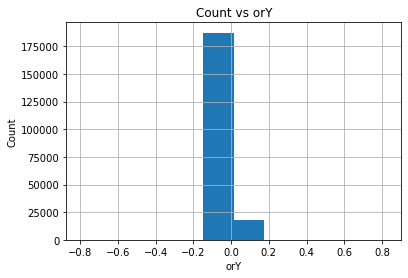

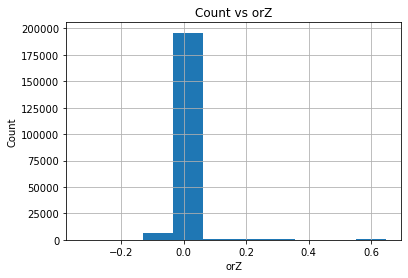

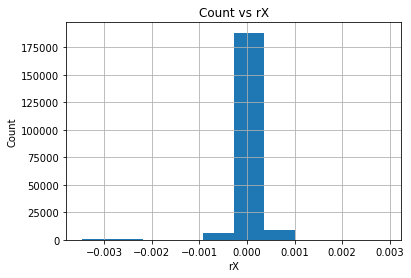

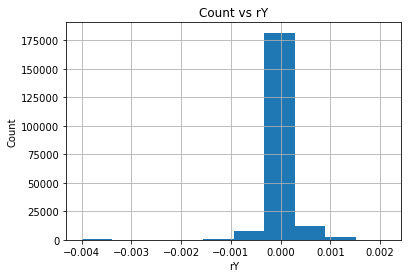

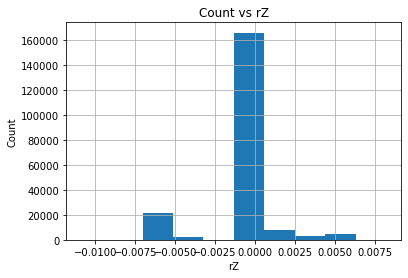

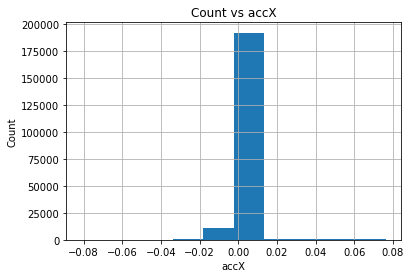

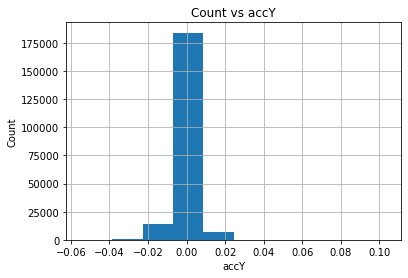

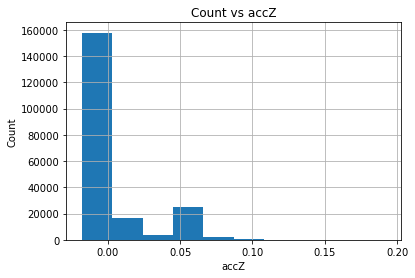

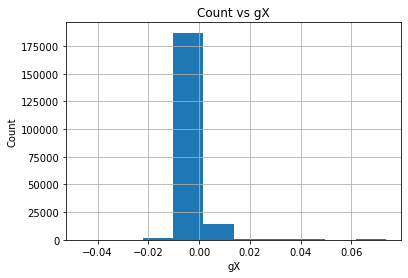

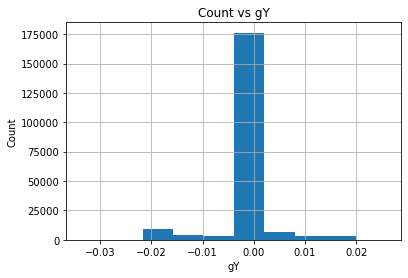

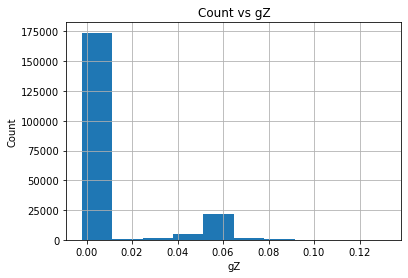

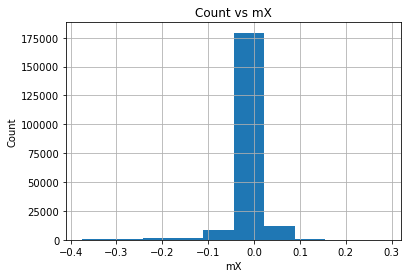

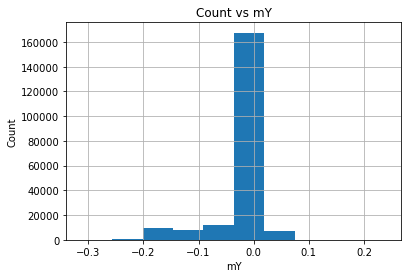

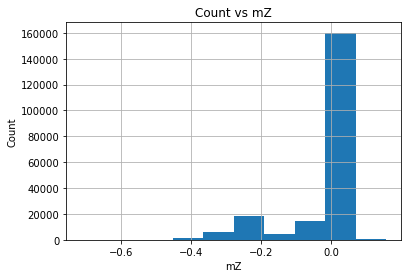

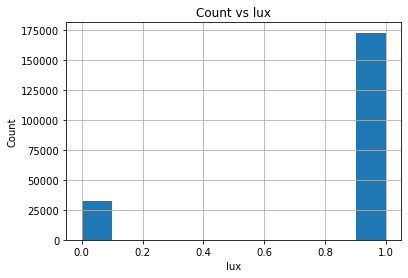

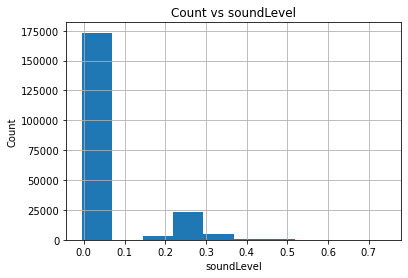

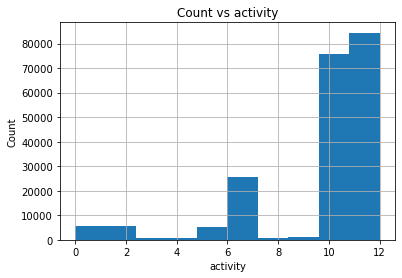

In [19]:
# checking for class imbalance using histogram plots. 
# A Display of the relationship between each features and its entries frequencies
for column in proc_data.columns:
    proc_data.hist(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count vs {column}')
    plt.show()
    print()

orX


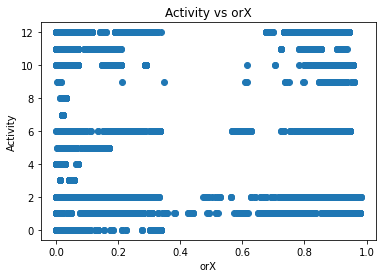


orY


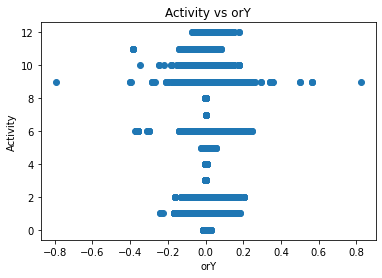


orZ


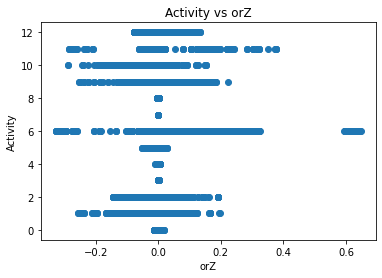


rX


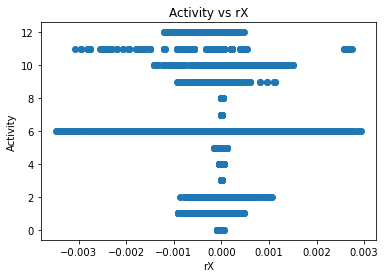


rY


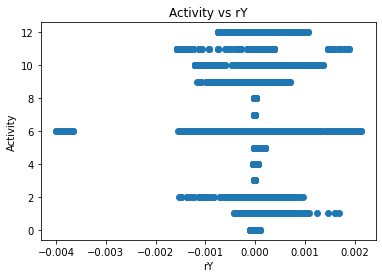


rZ


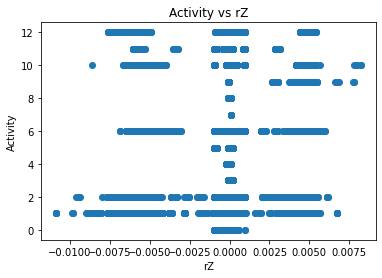


accX


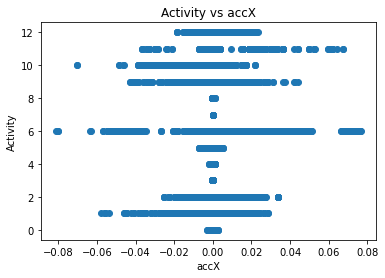


accY


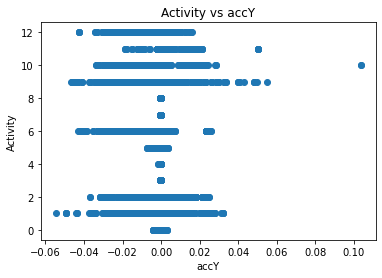


accZ


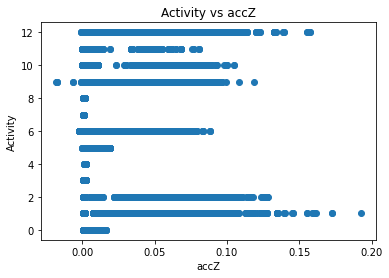


gX


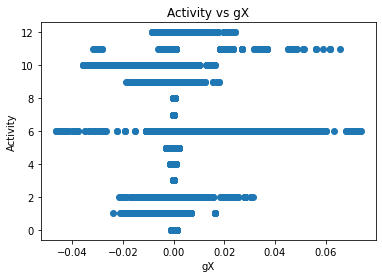


gY


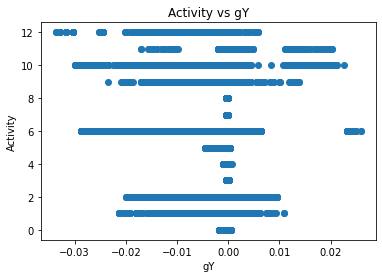


gZ


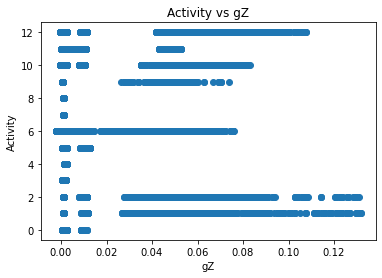


mX


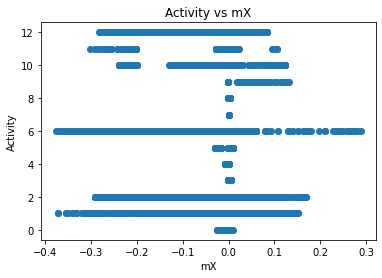


mY


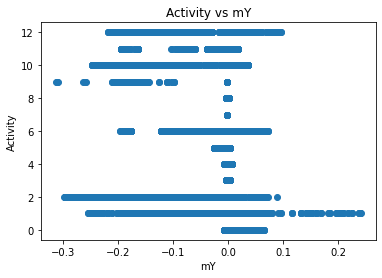


mZ


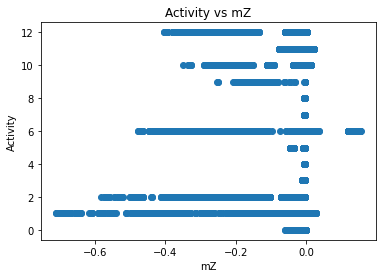


lux


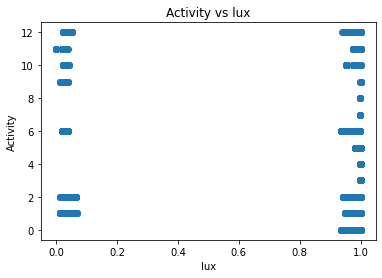


soundLevel


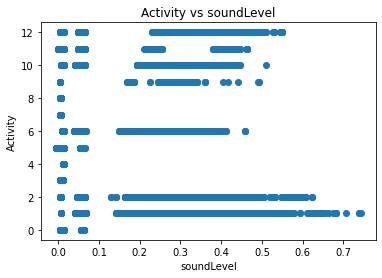


activity


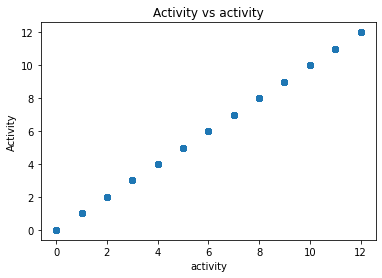

In [20]:
# Display of scatter plots showing relationship between the features and the target variable.
for column in proc_data.columns:
    print(column)
    plot = plt
    plot.scatter(proc_data[column],proc_data['activity'])
    plot.xlabel(column)
    plot.ylabel('Activity')
    plot.title(f'Activity vs {column}')
    plot.show()
    print()

Count vs Target


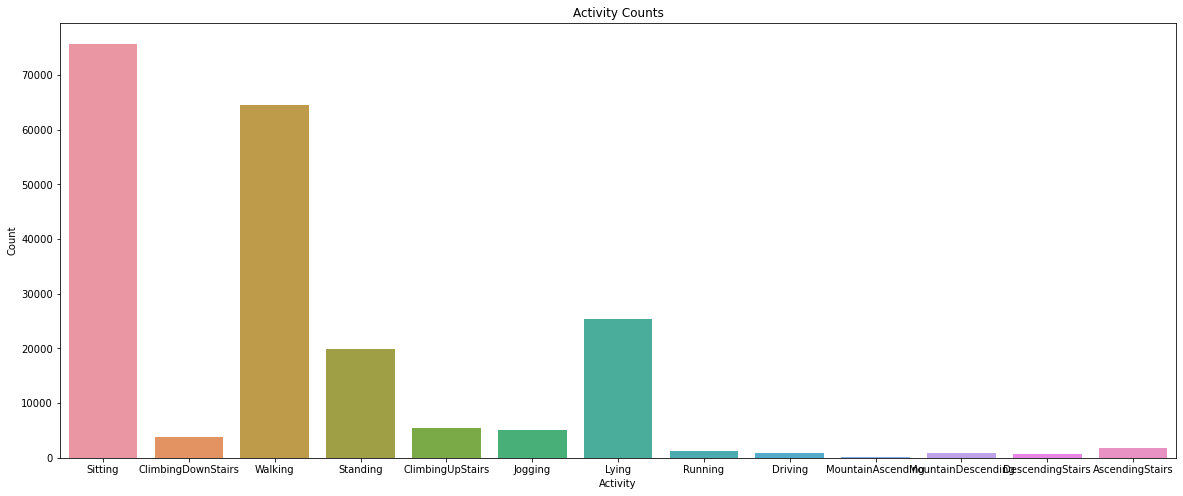


Count vs Encoded Target


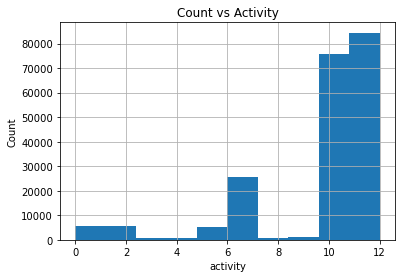

In [21]:
# A Visualization of the class imbalance in the target class using countplot.
print('Count vs Target')
fig , ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='activity', data=new_data, ax=ax)
ax.set_xlabel('Activity')
ax.set_ylabel('Count')
ax.set_title('Activity Counts')

plt.show()
print()
print('Count vs Encoded Target')
proc_data.hist('activity')
plt.xlabel('activity')
plt.ylabel('Count')
plt.title(f'Count vs Activity')
plt.show()

In [22]:
# In the target class, there are more entries for sitting(12) and walking(10)

# Addressing Class Imbalance

In [168]:
# Initializing the Model Class.
# Here the features and target will be splitted into train and test datasets.
# The train dataset will be balanced by over sampling.

model = Model(features, target)

In [169]:
# Splitting dataset and balancing train dataset
model.split_and_balance()

splitting train-test data...
Splitted Successfully!
Balancing train data set...
Balanced Successfully!


In [170]:
# Converting y_train to dataframe for data visualization.
y_train_pd = pd.DataFrame(model.y_train, columns = [new_data.columns[-1]])

In [171]:
y_train_pd.info

<bound method DataFrame.info of        activity
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
...         ...
18858      12.0
18859      12.0
18860      12.0
18861      12.0
18862      12.0

[18863 rows x 1 columns]>

In [172]:
target_unique = y_train_pd['activity'].unique()
target_unique

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

Count vs Encoded Target


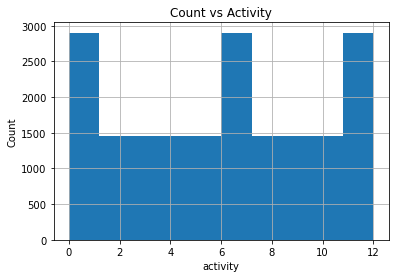

In [173]:
# Visulization of balanced train dataset.
print('Count vs Encoded Target')
y_train_pd.hist('activity')
plt.xlabel('activity')
plt.ylabel('Count')
plt.title(f'Count vs Activity')
plt.show()

# Building Classification Models

In [175]:
# Fitting Models
fitted_models1 = model.fit_models()

Creating models...
Models created successfully!
splitting train-test data...
Splitted Successfully!
Balancing train data set...
Balanced Successfully!
Fitting models...
Fitting RandomForestClassifier Model ...
Fitting KNeighborsClassifier Model ...
Fitting LogisticRegression Model ...


C:\Users\Kennyabby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting MLPClassifier Model ...
Iteration 1, loss = 2.49956953
Iteration 2, loss = 2.31362570
Iteration 3, loss = 2.25196135
Iteration 4, loss = 2.19925246
Iteration 5, loss = 2.15431491
Iteration 6, loss = 2.11628470
Iteration 7, loss = 2.08839738
Iteration 8, loss = 2.05936997
Iteration 9, loss = 2.03805822
Iteration 10, loss = 2.02123465
Iteration 11, loss = 2.00909063
Iteration 12, loss = 2.00068106
Iteration 13, loss = 1.98929585
Iteration 14, loss = 1.98462750
Iteration 15, loss = 1.97633548
Iteration 16, loss = 1.97019903
Iteration 17, loss = 1.96588148
Iteration 18, loss = 1.96406712
Iteration 19, loss = 1.95736086
Iteration 20, loss = 1.95254190
Iteration 21, loss = 1.94505129
Iteration 22, loss = 1.94314097
Iteration 23, loss = 1.93915209
Iteration 24, loss = 1.92986923
Iteration 25, loss = 1.88143072
Iteration 26, loss = 1.82326177
Iteration 27, loss = 1.78895784
Iteration 28, loss = 1.76664726
Iteration 29, loss = 1.74997646
Iteration 30, loss = 1.73283254
Iteration 31, los

In [176]:
# Predicting test target variable
model.predict_test()
# Initializing an array of predicted target variable for each model
y_preds1 = model.y_preds

In [177]:
# Collecting model names from created dictionary
dict_keys = model.dict_keys

In [178]:
X_test1 = model.X_test
X_train1 = model.X_train

In [179]:
y_test1 = model.y_test
y_train1 =  model.y_train

# Performance Metrics

In [180]:
# Initializing the performanceMetric class
pm = PerformanceMetric(y_preds1, y_test1)

In [181]:
# Getting performance scores
performance_scores1 = pm.get_performance()

In [182]:
performance_scores1

[{'accuracy': 0.9615122615803815,
  'precision': 0.9679127643011507,
  'recall': 0.9615122615803815,
  'f1_score': 0.9628676210309005},
 {'accuracy': 0.8916893732970027,
  'precision': 0.935358200541445,
  'recall': 0.8916893732970027,
  'f1_score': 0.9019140120924435},
 {'accuracy': 0.08147625535227715,
  'precision': 0.14307802225899746,
  'recall': 0.08147625535227715,
  'f1_score': 0.0715544079238912},
 {'accuracy': 0.546175554690541,
  'precision': 0.7891988899021399,
  'recall': 0.546175554690541,
  'f1_score': 0.598055611804002}]

In [183]:
# Performance scores for each model
# Showing a dictionary of the following metric scores 'accuracy', 'precision', 'recall', 'f1-score'
for i,model in enumerate(dict_keys):
    print(f'Performance score for {model} on test set is {performance_scores1[i]}')
    print()

Performance score for RandomForestClassifier on test set is {'accuracy': 0.9615122615803815, 'precision': 0.9679127643011507, 'recall': 0.9615122615803815, 'f1_score': 0.9628676210309005}

Performance score for KNeighborsClassifier on test set is {'accuracy': 0.8916893732970027, 'precision': 0.935358200541445, 'recall': 0.8916893732970027, 'f1_score': 0.9019140120924435}

Performance score for LogisticRegression on test set is {'accuracy': 0.08147625535227715, 'precision': 0.14307802225899746, 'recall': 0.08147625535227715, 'f1_score': 0.0715544079238912}

Performance score for MLPClassifier on test set is {'accuracy': 0.546175554690541, 'precision': 0.7891988899021399, 'recall': 0.546175554690541, 'f1_score': 0.598055611804002}



# Confusion Matrix

RandomForestClassifier


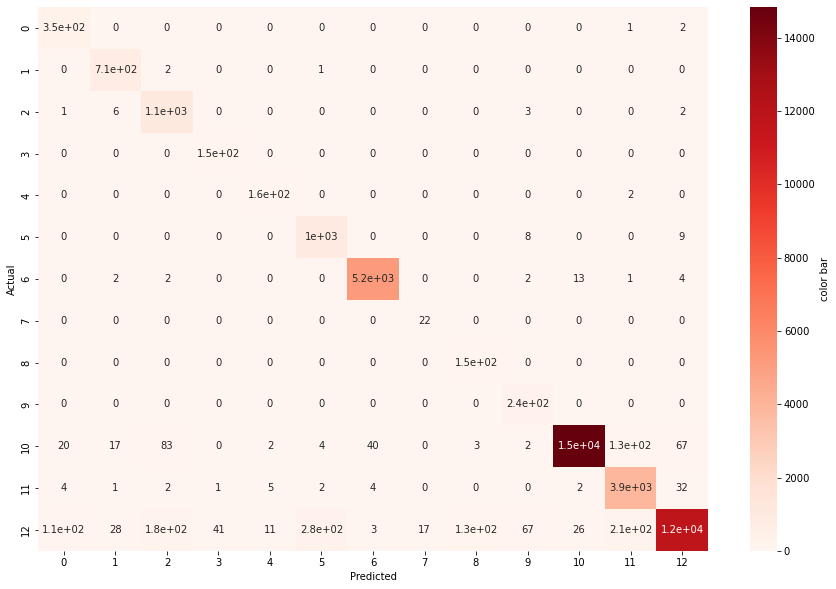

KNeighborsClassifier


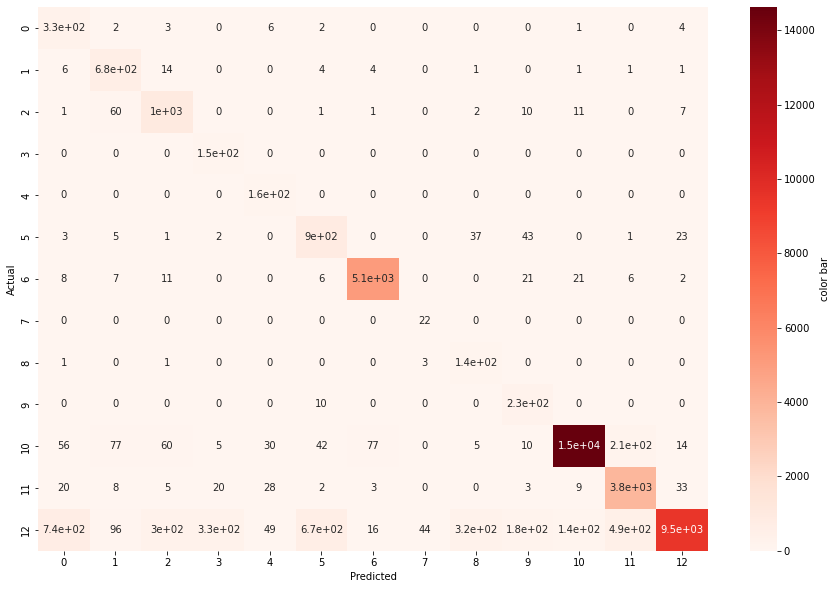

LogisticRegression


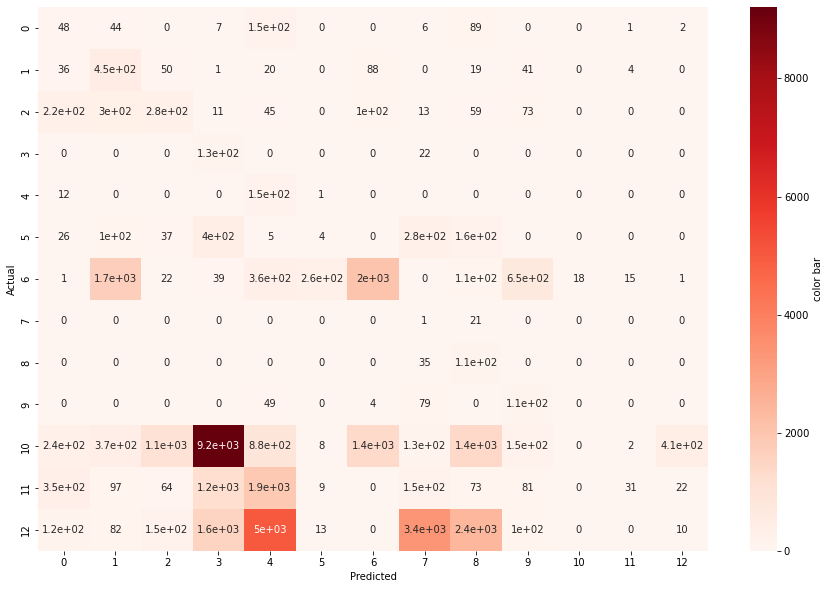

MLPClassifier


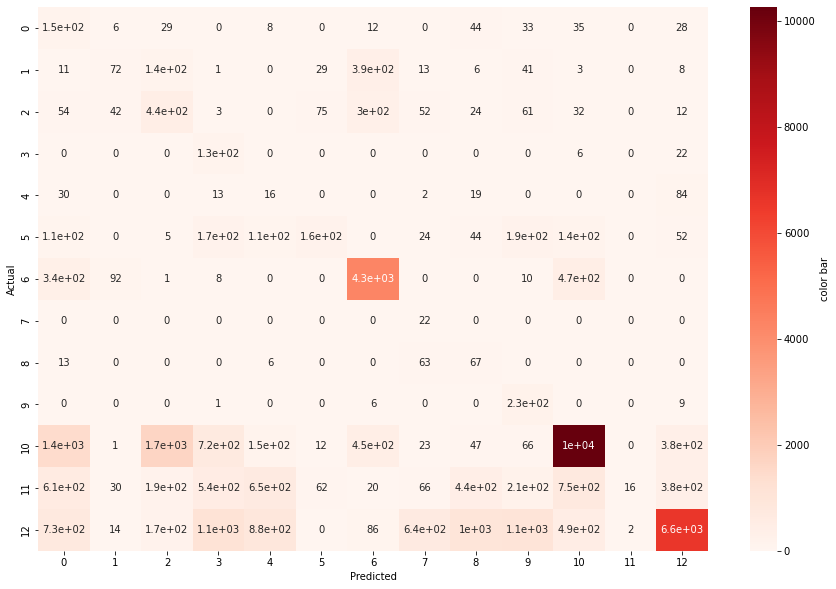

In [184]:
# A visualization of the confusion matrix of the Actual vs Predicted for the fitted models
for i,model in enumerate(dict_keys):
    
    print(model)
    svc_conf_mx = confusion_matrix(y_test1,y_preds1[i], labels = target_unique)
    f,ax = plt.subplots(figsize=(15,10))
    sns.heatmap(svc_conf_mx, cmap="Reds", annot = True, cbar_kws={"orientation":"vertical","label":"color bar"})
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Classification Report

In [185]:
# A view of the classification report on the model performance.
for i,model in enumerate(dict_keys):
    print(model+'\n')
    print(classification_report(y_test1, y_preds1[i], labels = target_unique))
    print()

RandomForestClassifier

              precision    recall  f1-score   support

         0.0       0.73      0.99      0.84       349
         1.0       0.93      1.00      0.96       709
         2.0       0.80      0.99      0.89      1105
         3.0       0.79      1.00      0.88       154
         4.0       0.90      0.99      0.94       164
         5.0       0.78      0.98      0.87      1016
         6.0       0.99      1.00      0.99      5193
         7.0       0.56      1.00      0.72        22
         8.0       0.53      1.00      0.70       149
         9.0       0.75      1.00      0.86       244
        10.0       1.00      0.98      0.99     15207
        11.0       0.92      0.99      0.95      3958
        12.0       0.99      0.91      0.95     12834

    accuracy                           0.96     41104
   macro avg       0.82      0.99      0.89     41104
weighted avg       0.97      0.96      0.96     41104


KNeighborsClassifier

              precision    recal

# Using Feature Extraction

In [114]:
# Initializing the Feature Extration Class
fe = FeatureExtractor(features)

In [115]:
# Performing Statistical analysis of the features.
fe.set_stats()

In [116]:
# Intializing the recently created statistical features
feature_matrix = fe.get_feature_matrix()

In [117]:
# Converting statistical features to Dataframe for proper description and analysis.
feature_df = fe.get_feature_df()

In [118]:
# Initializing a dictionary of the statisitcal features and their values.
stats_dict = fe.get_stats()

In [119]:
# A view of the mean, median, standard deviation, variance, sum of squares (sos), root mean square (rms) and zero-crossing
stats_dict

{'mean': array([[0.05970057],
        [0.0597564 ],
        [0.05977014],
        ...,
        [0.06314852],
        [0.06313507],
        [0.06313507]]),
 'median': array([[1.41930215e-05],
        [1.42907345e-05],
        [3.06316578e-05],
        ...,
        [1.23363481e-04],
        [1.22926045e-04],
        [1.22926045e-04]]),
 'std_dev': array([[0.23507312],
        [0.23505893],
        [0.23505544],
        ...,
        [0.23417044],
        [0.23417406],
        [0.23417406]]),
 'variance': array([[0.05525937],
        [0.0552527 ],
        [0.05525106],
        ...,
        [0.05483579],
        [0.05483749],
        [0.05483749]]),
 'sos': array([[0.93940931],
        [0.93929594],
        [0.93926802],
        ...,
        [0.9322085 ],
        [0.93223736],
        [0.93223736]]),
 'rms': array([[0.24253563],
        [0.24253563],
        [0.24253563],
        ...,
        [0.24253563],
        [0.24253563],
        [0.24253563]]),
 'zero_crossing': array([[0.94117647],


# Feature Selection

In [121]:
# Intializing the Feature Selector Class
fs = FeatureSelector(feature_matrix, target, stats_dict)

In [122]:
# Computing the mutual information scores to be used in the feature selection.
fs.get_mi_scores()

{'mean': '0.911',
 'median': '1.108',
 'std_dev': '0.910',
 'variance': '0.910',
 'sos': '0.911',
 'rms': '0.008',
 'zero_crossing': '0.134'}

In [125]:
selected_features = fs.get_selected_features(6)

In [126]:
selected_features

['mean', 'median', 'std_dev', 'variance', 'sos', 'zero_crossing']

In [127]:
selected_feature_df = feature_df[selected_features]

In [128]:
new_features = feature_df[selected_features].values

In [129]:
target_df = pd.DataFrame(target, columns = [new_data.columns[-1]])

proc_features = pd.concat((selected_feature_df, target_df),axis =1)

In [130]:
corr_matrix = proc_features.corr()
corr_matrix['activity'].sort_values(ascending=False)

activity         1.000000
variance         0.024128
sos              0.024128
std_dev          0.002362
zero_crossing   -0.099484
mean            -0.133977
median          -0.177453
Name: activity, dtype: float64

In [131]:
corr_matrix

,mean,median,std_dev,variance,sos,zero_crossing,activity
mean,1.000000,-0.015956,0.340278,0.219581,0.219581,0.076422,-0.133977
median,-0.015956,1.000000,0.007896,0.004954,0.004954,-0.070477,-0.177453
std_dev,0.340278,0.007896,1.000000,0.991967,0.991967,0.203947,0.002362
variance,0.219581,0.004954,0.991967,1.000000,1.000000,0.203245,0.024128
sos,0.219581,0.004954,0.991967,1.000000,1.000000,0.203245,0.024128
zero_crossing,0.076422,-0.070477,0.203947,0.203245,0.203245,1.000000,-0.099484
activity,-0.133977,-0.177453,0.002362,0.024128,0.024128,-0.099484,1.000000


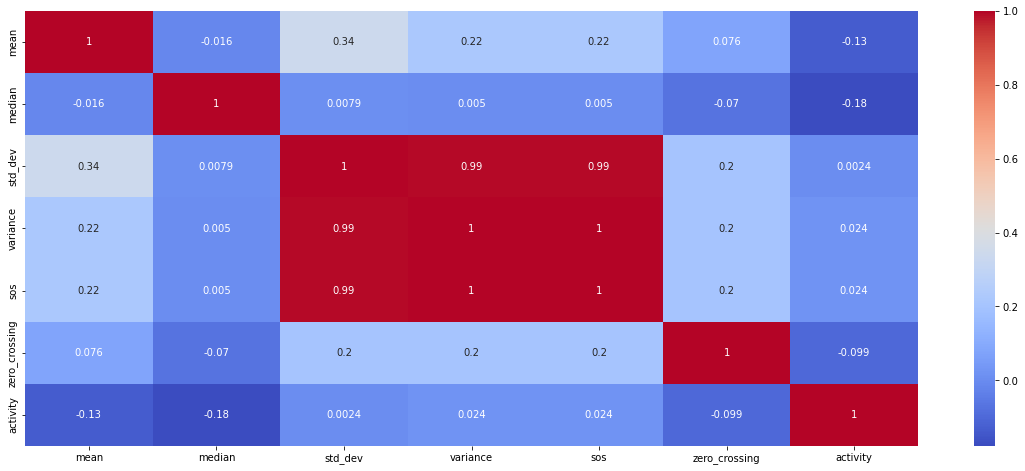

In [132]:
# A Heatmap displaying a visualization of the correlations between the columns.

# Assigning plot size
plt.subplots(figsize=(20,8))

# Geneting heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

# Data Visualization

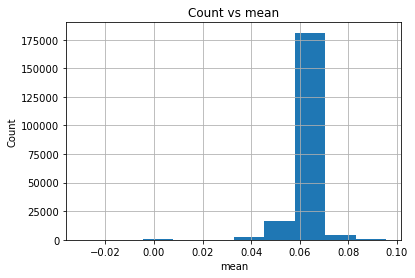

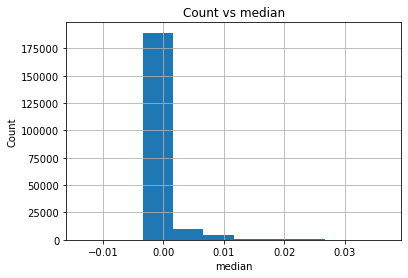

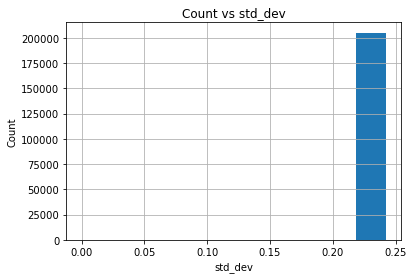

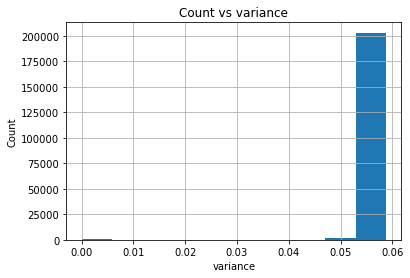

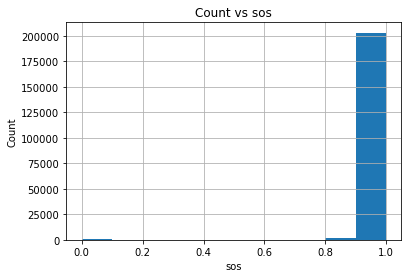

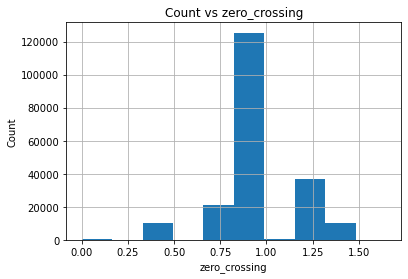

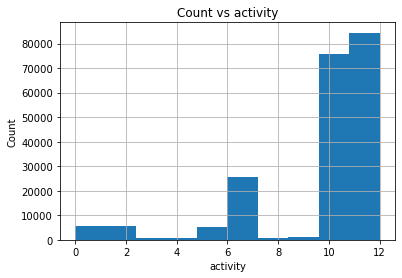

In [133]:
# A Display of the relationship between each statistical features and its entries frequencies
for column in proc_features.columns:
    proc_features.hist(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count vs {column}')
    plt.show()
    print()


mean


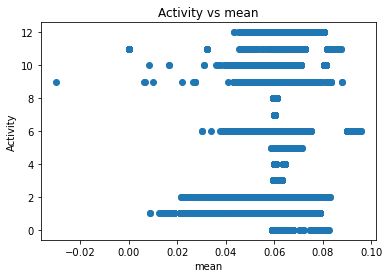


median


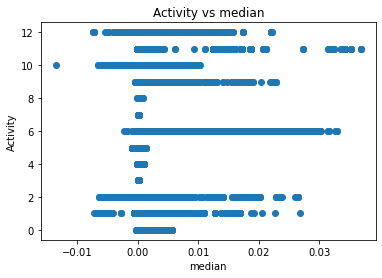


std_dev


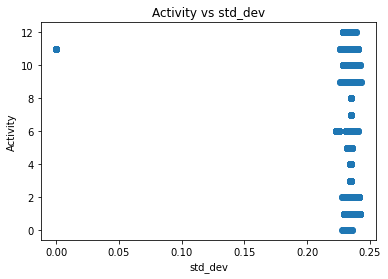


variance


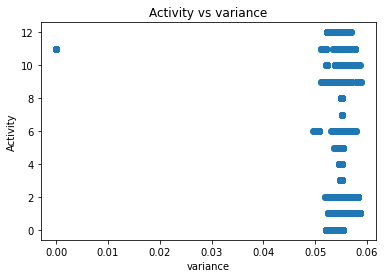


sos


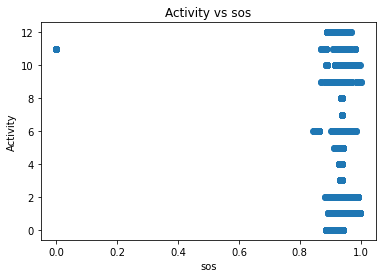


zero_crossing


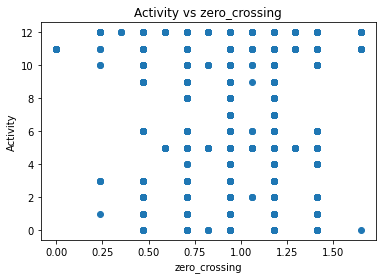


activity


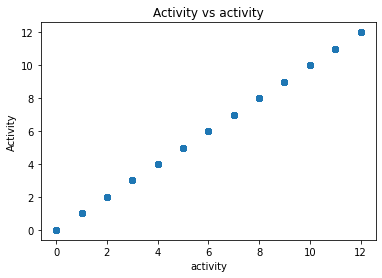

In [134]:
# Display of scatter plots showing relationship between the statistical features and the target variable.
for column in proc_features.columns:
    print(column)
    plot = plt
    plot.scatter(proc_features[column],proc_features['activity'])
    plot.xlabel(column)
    plot.ylabel('Activity')
    plot.title(f'Activity vs {column}')
    plot.show()
    print()

# Addressing Class Imbalance

In [152]:
# Initializing the Model Class.
# Here the features and target will be splitted into train and test datasets.
# The train dataset will be balanced by over sampling.

model = Model(new_features, target)

In [153]:
# Splitting dataset and balancing train dataset
model.split_and_balance()

splitting train-test data...
Splitted Successfully!
Balancing train data set...
Balanced Successfully!


In [154]:
# Converting y_train to dataframe for data visualization.
y_train_pd = pd.DataFrame(model.y_train, columns = [new_data.columns[-1]])

In [155]:
y_train_pd.info

<bound method DataFrame.info of        activity
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
...         ...
18858      12.0
18859      12.0
18860      12.0
18861      12.0
18862      12.0

[18863 rows x 1 columns]>

In [156]:
target_unique = y_train_pd['activity'].unique()
target_unique

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

Count vs Encoded Target


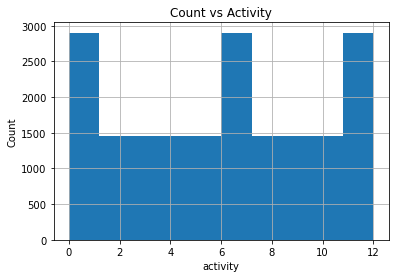

In [157]:
# Visulization of balanced train dataset.
print('Count vs Encoded Target')
y_train_pd.hist('activity')
plt.xlabel('activity')
plt.ylabel('Count')
plt.title(f'Count vs Activity')
plt.show()

# Building Classification Models

In [143]:
# Fitting Classification Models
fitted_models = model.fit_models()

Creating models...
Models created successfully!
splitting train-test data...
Splitted Successfully!
Balancing train data set...
Balanced Successfully!
Fitting models...
Fitting RandomForestClassifier Model ...
Fitting KNeighborsClassifier Model ...
Fitting LogisticRegression Model ...


C:\Users\Kennyabby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting MLPClassifier Model ...
Iteration 1, loss = 2.58341886
Iteration 2, loss = 2.54179664
Iteration 3, loss = 2.47200961
Iteration 4, loss = 2.45252703
Iteration 5, loss = 2.44999460
Iteration 6, loss = 2.44912631
Iteration 7, loss = 2.44936848
Iteration 8, loss = 2.44707307
Iteration 9, loss = 2.44666371
Iteration 10, loss = 2.44508202
Iteration 11, loss = 2.44162486
Iteration 12, loss = 2.43711470
Iteration 13, loss = 2.43040708
Iteration 14, loss = 2.42078453
Iteration 15, loss = 2.41074960
Iteration 16, loss = 2.40082165
Iteration 17, loss = 2.39250166
Iteration 18, loss = 2.38595089
Iteration 19, loss = 2.37765293
Iteration 20, loss = 2.37263463
Iteration 21, loss = 2.36439811
Iteration 22, loss = 2.35845486
Iteration 23, loss = 2.35517494
Iteration 24, loss = 2.34866819
Iteration 25, loss = 2.34100919
Iteration 26, loss = 2.33413467
Iteration 27, loss = 2.33045391
Iteration 28, loss = 2.32647932
Iteration 29, loss = 2.32255419
Iteration 30, loss = 2.32035005
Iteration 31, los

C:\Users\Kennyabby\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [144]:
# Predicting test target variable
model.predict_test()
# Initializing an array of predicted target variable for each model
y_preds = model.y_preds

In [145]:
# Collecting model names from created dictionary
dict_keys = model.dict_keys

In [146]:
X_test = model.X_test
X_train = model.X_train

In [147]:
y_test = model.y_test
y_train =  model.y_train

# Performance Metrics

In [148]:
# Initializing Performance Metrics class
pm = PerformanceMetric(y_preds, y_test)

In [149]:
performance_score = pm.get_performance()

C:\Users\Kennyabby\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kennyabby\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
performance_score

[{'accuracy': 0.7041407162319969,
  'precision': 0.8337223440205618,
  'recall': 0.7041407162319969,
  'f1_score': 0.7393827159811273},
 {'accuracy': 0.6169715842740366,
  'precision': 0.830599285716865,
  'recall': 0.6169715842740366,
  'f1_score': 0.6657174279849757},
 {'accuracy': 0.2602909692487349,
  'precision': 0.34005007236354945,
  'recall': 0.2602909692487349,
  'f1_score': 0.27677645764414643},
 {'accuracy': 0.2145533281432464,
  'precision': 0.4725095126663462,
  'recall': 0.2145533281432464,
  'f1_score': 0.24712060903256886}]

In [151]:
for i,model in enumerate(dict_keys):
    print(f'Performance score for {model} on test set is {performance_score[i]}')
    print()
    

Performance score for RandomForestClassifier on test set is {'accuracy': 0.7041407162319969, 'precision': 0.8337223440205618, 'recall': 0.7041407162319969, 'f1_score': 0.7393827159811273}

Performance score for KNeighborsClassifier on test set is {'accuracy': 0.6169715842740366, 'precision': 0.830599285716865, 'recall': 0.6169715842740366, 'f1_score': 0.6657174279849757}

Performance score for LogisticRegression on test set is {'accuracy': 0.2602909692487349, 'precision': 0.34005007236354945, 'recall': 0.2602909692487349, 'f1_score': 0.27677645764414643}

Performance score for MLPClassifier on test set is {'accuracy': 0.2145533281432464, 'precision': 0.4725095126663462, 'recall': 0.2145533281432464, 'f1_score': 0.24712060903256886}



# Confussion Matrix

RandomForestClassifier


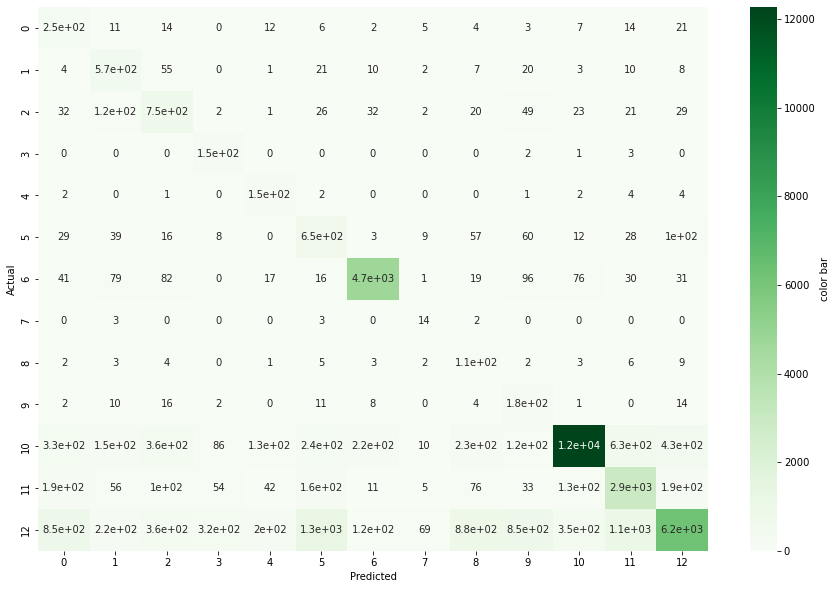

KNeighborsClassifier


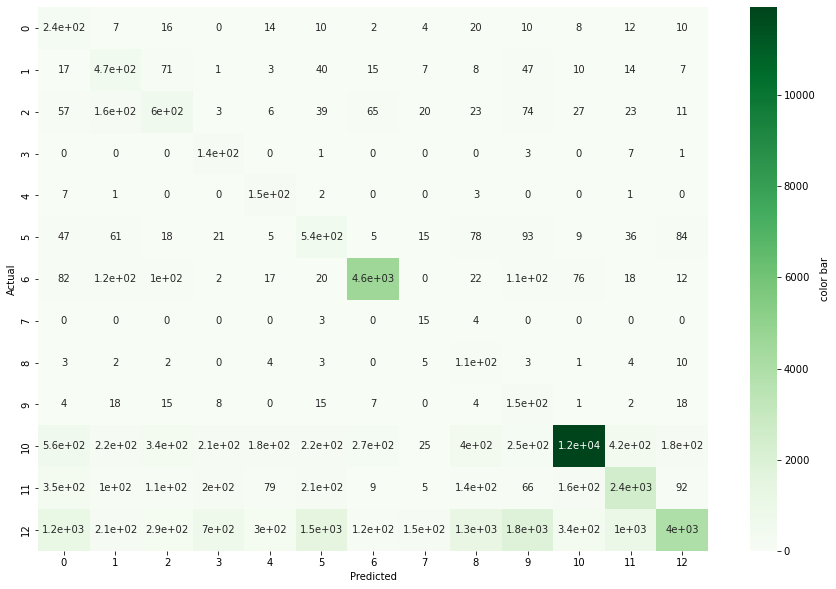

LogisticRegression


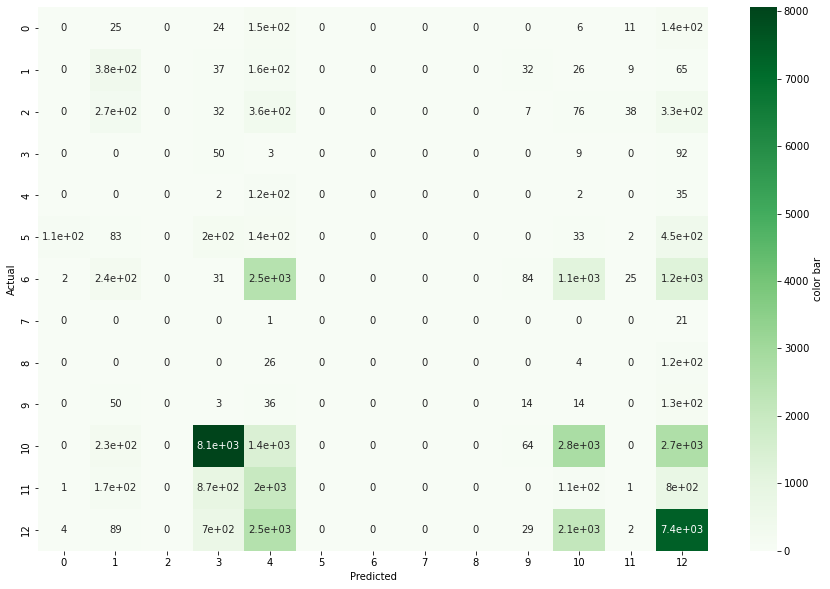

MLPClassifier


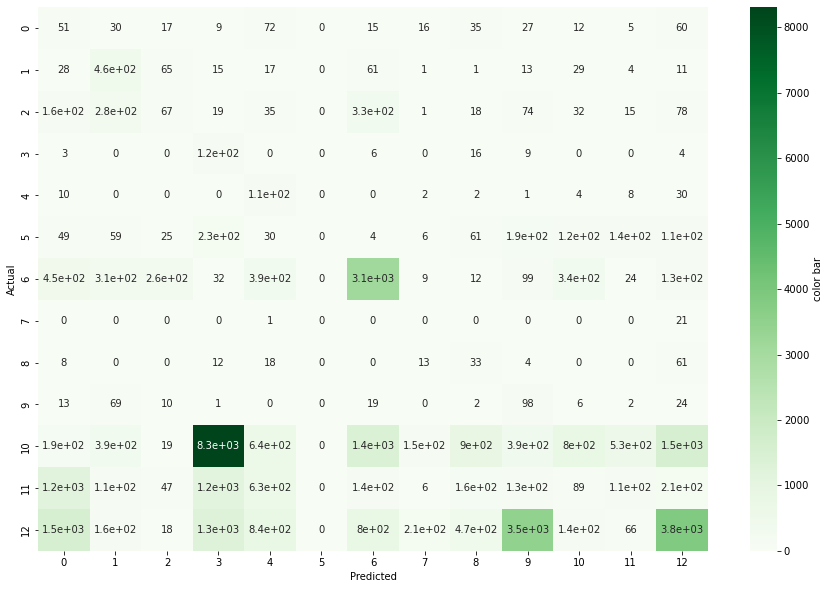

In [166]:
# A visualization of the confusion matrix of the Actual vs Predicted for the fitted models
for i,model in enumerate(dict_keys):
    
    print(model)
    svc_conf_mx = confusion_matrix(y_test,y_preds[i], labels = target_unique)
    f,ax = plt.subplots(figsize=(15,10))
    sns.heatmap(svc_conf_mx, cmap="Greens", annot = True, cbar_kws={"orientation":"vertical","label":"color bar"})
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [167]:
# A view of the classification report on the model performance.
for i,model in enumerate(dict_keys):
    print(model+'\n')
    print(classification_report(y_test, y_preds[i], labels = target_unique))
    print()

RandomForestClassifier

              precision    recall  f1-score   support

         0.0       0.14      0.72      0.24       349
         1.0       0.45      0.80      0.58       709
         2.0       0.43      0.68      0.52      1105
         3.0       0.24      0.96      0.38       154
         4.0       0.27      0.90      0.41       164
         5.0       0.26      0.64      0.37      1016
         6.0       0.92      0.91      0.91      5193
         7.0       0.12      0.64      0.20        22
         8.0       0.08      0.73      0.14       149
         9.0       0.13      0.72      0.21       244
        10.0       0.95      0.81      0.87     15207
        11.0       0.62      0.74      0.67      3958
        12.0       0.88      0.49      0.63     12834

    accuracy                           0.70     41104
   macro avg       0.42      0.75      0.47     41104
weighted avg       0.83      0.70      0.74     41104


KNeighborsClassifier

              precision    recal

C:\Users\Kennyabby\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kennyabby\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kennyabby\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kennyabby\anaconda3\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       349
         1.0       0.25      0.54      0.34       709
         2.0       0.00      0.00      0.00      1105
         3.0       0.00      0.32      0.01       154
         4.0       0.01      0.76      0.03       164
         5.0       0.00      0.00      0.00      1016
         6.0       0.00      0.00      0.00      5193
         7.0       0.00      0.00      0.00        22
         8.0       0.00      0.00      0.00       149
         9.0       0.06      0.06      0.06       244
        10.0       0.44      0.18      0.26     15207
        11.0       0.01      0.00      0.00      3958
        12.0       0.55      0.57      0.56     12834

    accuracy                           0.26     41104
   macro avg       0.10      0.19      0.10     41104
weighted avg       0.34      0.26      0.28     41104


MLPClassifier

              precision    recall  f1-score   support

        

C:\Users\Kennyabby\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kennyabby\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Experimenting with the RandomForest Classification Model

In [265]:
# Funtion to predict exact values of the features provided using the RondomForest Classification Model (without feature extraction)
def predict_target(model, features_array, index='', compare = False):
    test_model = pickle.dumps(model)# This persists the model
    p_model = pickle.loads(test_model)#loads the model
    
    if compare:
        pred = p_model.predict([features_array[index]])[0] #predicts the target using the feautures data
        return (f'Correctly Predicted: {pred==y_test1[index]}', act_data['activity'].unique()[int(pred)])
       
    else:
        pred = p_model.predict([features_array])[0] #predicts the target using the feautures data
        return pred

In [279]:
# Makes use of test dataset raw dataset (act_data).
print('\n--- Acitivity Context Recognition Model ----\n')
not_error = True
while not_error:
    try:
        not_error = False
        boolean = input('Do you wish to use values from existing dataset? enter yes to proceed, or any other key to skip!: ')
        if boolean == 'yes':
            ind = eval(input('Enter the index of your entry: '))
            print('\nPredicting...\n')
            predicted_val = predict_target(fitted_models1[0], X_test1, index=ind, compare=True)
            print(predicted_val)
        else:
            feature_str = input('Enter the features of the activity using comma seperations:')
            feature_array = feature_str.split(',')
            features = [float(val) for val in feature_array]
            print('\nPredicting...\n')
            predicted_val = predict_target(fitted_models1[0], features)
            print('activity is:',act_data['activity'].unique()[int(predicted_val)])
    except ValueError as err:
        print(err)
        print('\nPlease Enter Numbers!')
        not_error = True
        


--- Acitivity Context Recognition Model ----

Do you wish to use values from existing dataset? enter yes to proceed, or any other key to skip!: no
Enter the features of the activity using comma seperations:34,34,545,64,2,543,665,33,23,564,23,554,77,32,0.0043,-0.004322,32

Predicting...

activity is: ClimbingDownStairs


In [234]:
float('89.43')

89.43